In [ ]:
import os
from fastcore.all import *
from fastai.vision.all import *

# Data Acquisition

In [2]:
# Set relative path where GTZAN mel-spectrograms are stored
path = Path("../dev/spec")

# Check that files are intact
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

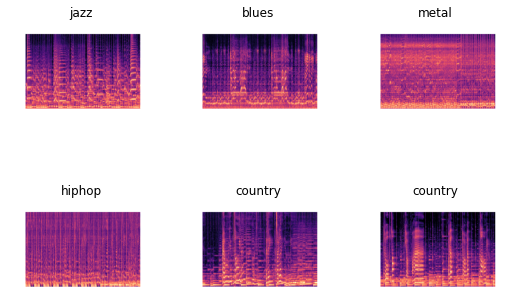

In [3]:
# Create datablock
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42069),
    get_y=parent_label
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

# Model Training

In [5]:
# Learn using Resnet18
learn = vision_learner(dls, resnet18, metrics=error_rate)

SuggestedLRs(valley=0.001737800776027143)

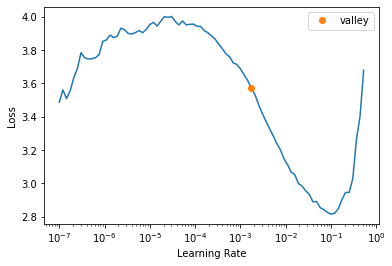

In [6]:
# Estimate learning rate to be used for training
learn.lr_find()

In [8]:
# Train model
learn.fine_tune(5, base_lr=20e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.898852,3.124652,0.545000,01:44


epoch,train_loss,valid_loss,error_rate,time
0,1.603844,2.200107,0.460000,02:21
1,1.462385,4.453667,0.585000,02:32
2,1.109869,1.530039,0.390000,02:33
3,0.760533,1.119718,0.245000,02:35
4,0.498491,0.890242,0.260000,02:33


SuggestedLRs(valley=0.00013182566908653826)

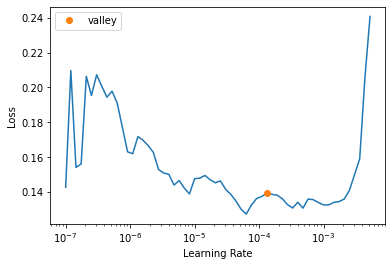

In [9]:
# Estimate new learning rate on trained model
learn.lr_find()

In [10]:
# Use new learning rate and fit one cycle training method
learn.fit_one_cycle(5, lr_max=3.17e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.148741,0.894949,0.245000,02:33
1,0.129598,0.892887,0.230000,02:35
2,0.104787,0.907546,0.235000,02:38
3,0.089272,0.904968,0.235000,02:37
4,0.079850,0.875336,0.225000,02:43


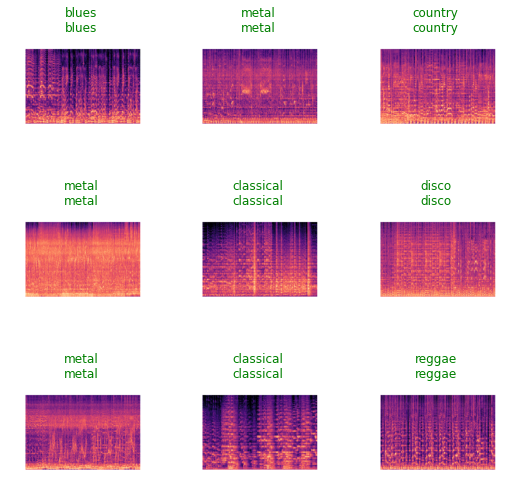

In [13]:
# See how the model performs
learn.show_results()

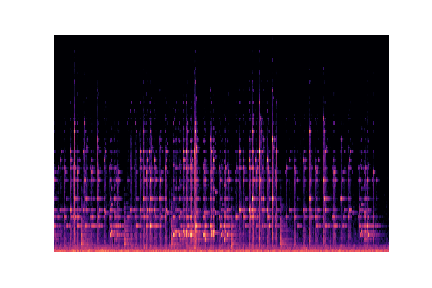

This is a classical track.
Probability it's not a classical track: 0.0007


In [16]:
# User input
input_image = PILImage.create("../dev/test/classical.png")
display(input_image)
genre,_,probs = learn.predict(input_image)
print(f"This is a {genre} track.")
print(f"Probability it's not a {genre} track: {probs[0]:.4f}")

# Export Trained Model

In [17]:
learn.export()